In [1]:
# kernel 3.6 (3.8 fails on scipy.optimize )
# code copies from IS .py file with data

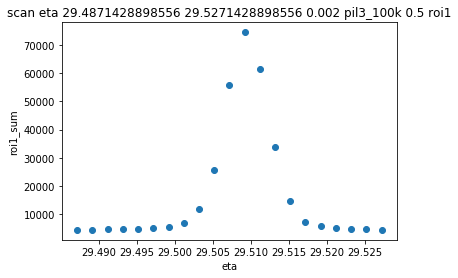

NeXusError: 'xtlinfo' not in /entry1/before_scan

In [3]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from dlstools.pdnx import *
from matplotlib.pyplot import *

#nxs_path = '/dls/tmp/voo82357/diffcalc/'
#nxs_filename = nxs_path + "978999.nxs"

#nxs_path = '/dls/tmp/voo82357/diffcalc/'
#nxs_filename = nxs_path + "978999.nxs"

p='/dls/i16/data/2023/si33845-1/%i.nxs'
n = pdnx(p % 1013477)
n.nx.plot()

#n = pdnx(nxs_filename)
#print(n.nx.tree)
#print(n.nx.entry1.sample.tree) # NXsample fields ub_matrix, unit_cell
print(n.nx.entry1.before_scan.xtlinfo.tree) # UB, unit_cell, UB_ref1,2 , crystal name etc (all from json)

# data in sample:NXsample, xtlinfo:NXcollection, ubMeta:NXcollection.value (json string)

In [4]:
print(n.nx.tree)

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      Ta:NXcollection
        Ta = 6.7361
      Tb:NXcollection
        Tb = 6.5727
      Tc:NXcollection
        Tc = 0.0
      Td:NXcollection
        Td = 0.0
      beamline_slits:NXcollection
        s1xcentre = -0.012
        s1xgap = 1.006
        s1ycentre = -0.082
        s1ygap = 0.895
        s2xcentre = -0.085725
        s2xgap = 19.999325
        s2ycentre = 0.3105
        s2ygap = 19.996
        s3xcentre = -4.1055
        s3xgap = 41.088
        s3ycentre = 0.3495
        s3ygap = 20.0065
        s4xcentre = -6.505
        s4xgap = 38.9815
        s4ycentre = -0.0005
        s4ygap = 28.003
        shtr3x = 11.505
        shtr3y = 4.28
      diffractometer_sample:NXcollection
        alpha = 33.77106013134484
        azih = 1.0
        azik = 0.0
        azil = 0.0
        beta = -33.74280115550531
        betain = 29.484027127119283
        betaout = 28.74991849862693
        chi = 88.98173616781644
        delta 

In [ ]:
dc = json.loads(str(n.nx.entry1.before_scan.ubMeta.value))
dc

In [ ]:
import json
import numpy as np
from pprint import pprint

import h5py
from diffcalc.hkl.calc import HklCalculation
from diffcalc.hkl.constraints import Constraints
from diffcalc.hkl.geometry import Position
from diffcalc.ub.calc import UBCalculation

ubstate_str = """{"crystal": [\"TiO2\", \"Tetragonal\", 4.5937, 4.5937, 2.9587, 90.0, 90.0, 90.0],
"name": "TiO2_feb2023",
"or0": 7,
"or1": 2,
"orientlist": {},
"reference": {"n_hkl_configured": [1.0, 0.0, 0.0], "n_phi_configured": null},
"reflist": {"1": {"energy": 4.5,
                   "hkl": [0.0, 0.0, 2.0],
                   "pos": [2.0585e-06, 137.251999625979, 7.2975e-06, 68.61599981298872, 90.00000034852737, 6.999999999998728],
                   "tag": "002 4.5 keV",
                   "time": "2023-02-15T15:53:31.079000"},
            "2": {"energy": 4.5,
                  "hkl": [1.0, 0.0, 1.0],
                  "pos": [0.0, 67.260244157257, 0.0, 33.63012207862893, 57.26343264308351, -37.834015141759075],
                  "tag": "101.0",
                  "time": "2023-02-15T18:44:38.156000"},
            "3": {"energy": 4.5,
                  "hkl": [0.0, 0.0, 1.0],
                  "pos": [0.0, 55.499498509021, 0.0, 27.73769963273587, 89.95709244904671, 52.17701738664687],
                  "tag": "001 psi = 180",
                  "time": "2023-02-15T18:56:02.809000"},
            "4": {"energy": 4.5,
                  "hkl": [0.0, 0.0, 2.0],
                  "pos": [0.0, 137.251999625979, 0.0, 68.75106356850227, 91.09766038301935, -6.526920256463711],
                  "tag": "sample in bender 002",
                  "time": "2023-02-16T17:20:06.023000"},
            "5": {"energy": 4.5,
                  "hkl": [0.0, 0.0, 2.0],
                  "pos": [0.0, 137.251999625979, 0.0, 69.6669517425505, 89.838043896394, 83.99999970306749],
                  "tag": "002 bent sample before bending",
                  "time": "2023-02-16T17:36:50.923000"},
            "6": {"energy": 4.5,
                  "hkl": [0.0, 0.0, 1.0],
                  "pos": [0.0, 55.499498509021, 0.0, 27.891785278828763, 91.04154887860705, -6.212311945314241],
                  "tag": "001 in bender no bend",
                  "time": "2023-02-16T18:01:27.601000"},
            "7": {"energy": 4.5,
                  "hkl": [0.0, 0.0, 1.0],
                  "pos": [0.0, 55.499498509021, 0.0, 27.79775790562909, 89.9570761270911, 52.0992185921341],
                  "tag": "001 after remounting gonio head",
                  "time": "2023-02-16T18:39:55.602000"}},
"sigma": 0,
"surface": {"n_hkl_configured": null, "n_phi_configured": [0.0, 0.0, 1.0]},
"tau": 0,
"u": null,
"ub": null}
"""


def get_hkl_positions(h, k, l, wavelength):
    """Demonstrate calculations of miller indices and diffractometer positions."""
    all_pos = hklcalc.get_position(h, k, l, wavelength)
    for idx, (pos_001, virtual_angles) in enumerate(all_pos, 1):
        print(f"\n{'hkl':<8s}: [{h:1.0f} {k:1.0f} {l:1.0f}]")
        print(f"---Solution {idx}----")
        for angle, val in pos_001.asdict.items():
            print(f"{angle:<8s}:{val:>8.2f}")
        print("-" * 18)
        for angle, val in virtual_angles.items():
            print(f"{angle:<8s}:{val:>8.2f}")
        print()


if __name__ == "__main__":
    nxs_path = '/dls/tmp/voo82357/diffcalc/'
    nxs_filename = nxs_path + "978999.nxs"
    f = h5py.File(nxs_filename, "r")

    crystal_name = f["/entry1/before_scan/xtlinfo/crystal_name"][()].decode("utf-8")
    crystal_symmetry = f["/entry1/before_scan/xtlinfo/crystal_symmetry"][()].decode(
        "utf-8"
    )
    ub_matrix = f["/entry1/sample/ub_matrix"][:]
    unit_cell = f["/entry1/sample/unit_cell"][:]
    wl = f["/entry1/sample/beam/incident_wavelength"][()]

    print(f"crystal_name : {crystal_name}")
    print(f"crystal_symmetry : {crystal_symmetry}")
    print(f"ub_matrix : {ub_matrix}")
    print(f"unit_cell : {unit_cell}")

    ubcalc = UBCalculation(crystal_name)

    ubcalc.set_lattice(crystal_name, crystal_symmetry, unit_cell[0][0], unit_cell[0][2])
    # set_ub command will work on a main branch and in the next release to setup
    # UBCalculation object.
    # For diffcalc-core versio n<= 0.4.0 we need to calculate U matrix from UB
    # and use set_u command.
    # ubcalc.set_ub(ub_matrix[0])
    tmp_matrix = np.array(ub_matrix[0]) @ np.linalg.inv(ubcalc.crystal.B)
    ubcalc.set_u(tmp_matrix / np.cbrt(np.linalg.det(tmp_matrix)))

    ubcalc.n_hkl = (1, 0, 0)

    print("UBCalculation object representation.\n")
    print(f"{ubcalc}")
    print("\nUB matrix defined as a (3, 3) NumPy array.\n")
    pprint(ubcalc.UB)

    cons = Constraints({"qaz": 0, "alpha": 0, "eta": 0})
    hklcalc = HklCalculation(ubcalc, cons)

    print("UBCalculation from UB matrix read from NeXus file.\n")
    get_hkl_positions(0, 1, 1, wl)

    ubstate = json.loads(ubstate_str)
    ref2 = ubstate["reflist"]["2"]
    ref6 = ubstate["reflist"]["6"]
    ref7 = ubstate["reflist"]["7"]
    for tmp_ref in (ref2, ref6, ref7):
        ubcalc.add_reflection(
            tmp_ref["hkl"], Position(*tmp_ref["pos"]), tmp_ref["energy"], tmp_ref["tag"]
        )

    ubcalc.calc_ub(idx1=ref2["tag"], idx2=ref6["tag"])
    print("UBCalculation from ref2 and ref6.\n")
    print(f"{ubcalc}")
    get_hkl_positions(0, 1, 1, wl)

    ubcalc.calc_ub(idx1=ref2["tag"], idx2=ref7["tag"])
    print("UBCalculation from ref2 and ref7.\n")
    print(f"{ubcalc}")
    get_hkl_positions(0, 1, 1, wl)
